# Kaggle : House Prices: Advanced Regression Techniques

This note book consist of Exploratory Data Analysis(EDA) and Sales Price prediction with different Regression Models for House Price prediction competition in Kaggle (refer : https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion?sortBy=new&group=upvoted&page=1&pageSize=20&category=all)
Related files are also checked in GIT along with this notebook
More refined solution is present in Kaggle Kernel https://www.kaggle.com/kushbhatnagar/first-competition-kernel-house-pricing-prediction

# 1.Getting the Data

Let's import the data and check columns data type and total records

In [1]:
#importing libraries and data set
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
dataset=pd.read_csv('train.csv')

In [2]:
#Checking total number records
dataset.shape

(1460, 81)

In [3]:
#Checking all columns
dataset.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
dataset.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

# 2. Selecting independent variables(features)

From the provided columns we have to select few columns as independent variables or features on which we can train our model

In [5]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
#Checking columns data types
#String data type
len(dataset.select_dtypes(include=['O']).columns)

43

In [7]:
#Integer data type
len(dataset.select_dtypes(include=['int64']).columns)

35

In [8]:
#Float data type
len(dataset.select_dtypes(include=['float64']).columns)

3

In [9]:
#Getting Correlation Coefficient of sale price with other numerical data
saleprice_corr=dataset.corr()['SalePrice']
saleprice_corr


Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

I have done detailed data analysis for this data set and it's present in this link https://docs.google.com/spreadsheets/d/1IyfMnTl4g8JUpI6N_l8QlPB42uwygR9-m-i1z5KciJ8/edit?usp=sharing , if anyone intrested can take a look

I took some help from the Kaggle Kernel https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python for data analysis.

I have created the spreadsheet with the following columns:

Variable - Variable name
    
Type - Identification of the variables' type. There are two possible values for this field: 'numerical' or 'categorical'. By 'numerical' we mean variables for which the values are numbers, and by 'categorical' we mean variables for which the values are categories

Category - Identification of the variables category . We can define three possible segments: building, space or location. When we say 'building', we mean a variable that relates to the physical characteristics of the building (e.g. 'OverallQual'). When we say 'space', we mean a variable that reports space properties of the house (e.g. 'TotalBsmtSF'). Finally, when we say a 'location', we mean a variable that gives information about the place where the house is located (e.g. 'Neighborhood')

Expected Effect on Sale Price - Our expectation about the variable influence in 'SalePrice'. We can use a categorical scale with 'High', 'Medium' and 'Low' as possible values. We can look at each variable and try to understand their meaning and relevance

Correlation Coefficient - Consist of correlation cofficient value for numerical variable

Conclusion - Our conclusions about the importance of the variable, after we give a quick look at the data and cofficenent

Note - Any general comments realted to variables

Based on above analysis I have come up with following variables as a posisble independent variables (features)
'Neighborhood','OverallQual','YearBuilt','ExterCond','TotalBsmtSF','GrLivArea'.
I have selected these variables from all of the segments (building, space and location) with 'High' expected effect on Sales Price.
Now , I will check the relation bewtween all these variables

In [10]:
#Creating independent variables data frame X
X=dataset[['Neighborhood','OverallQual','YearBuilt','ExterCond','TotalBsmtSF','GrLivArea','SalePrice']]

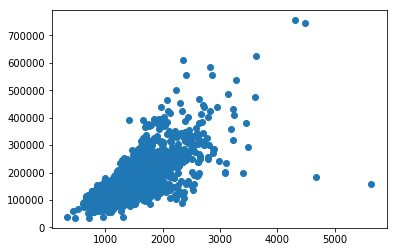

In [11]:
#Verifying the relation between GrLivArea and SalePrice
plt.scatter(X['GrLivArea'],X['SalePrice'])

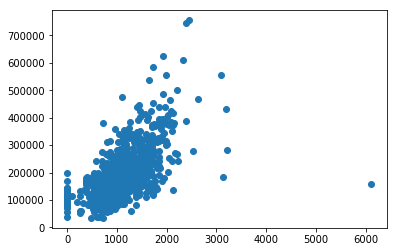

In [12]:
#Verifying the relation between TotalBsmtSF and SalePrice
plt.scatter(X['TotalBsmtSF'],X['SalePrice'])

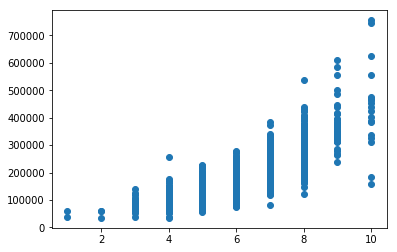

In [13]:
#Verifying the relation between OverallQual and SalePrice
plt.scatter(X['OverallQual'],X['SalePrice'])

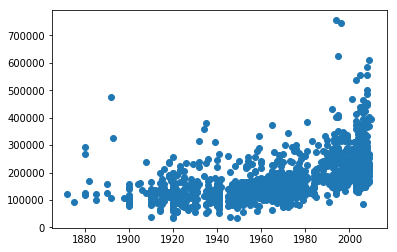

In [14]:
#Verifying the relation between YearBuilt and SalePrice
plt.scatter(X['YearBuilt'],X['SalePrice'])

C:\Python\Anaconda\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Python\Anaconda\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


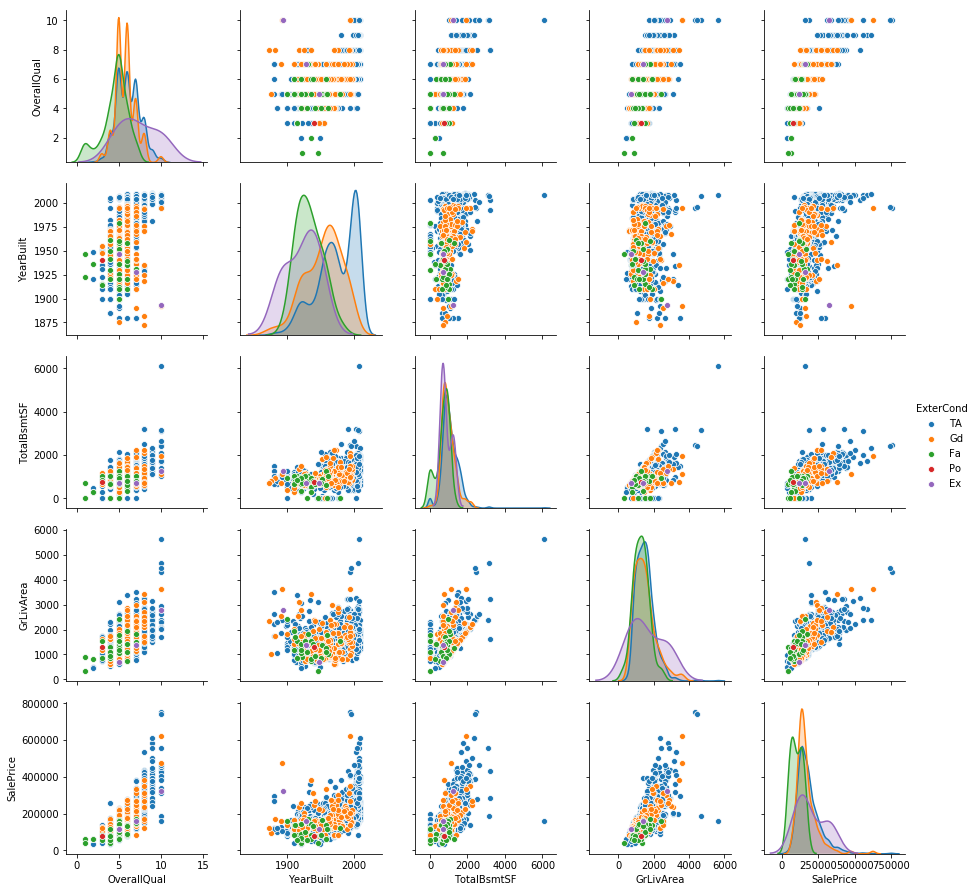

In [15]:
#Creating pair plot along with categorical variable 'ExterCond' to get relation with Sale Price and other variables
sns.pairplot(X,hue='ExterCond')

C:\Python\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Python\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


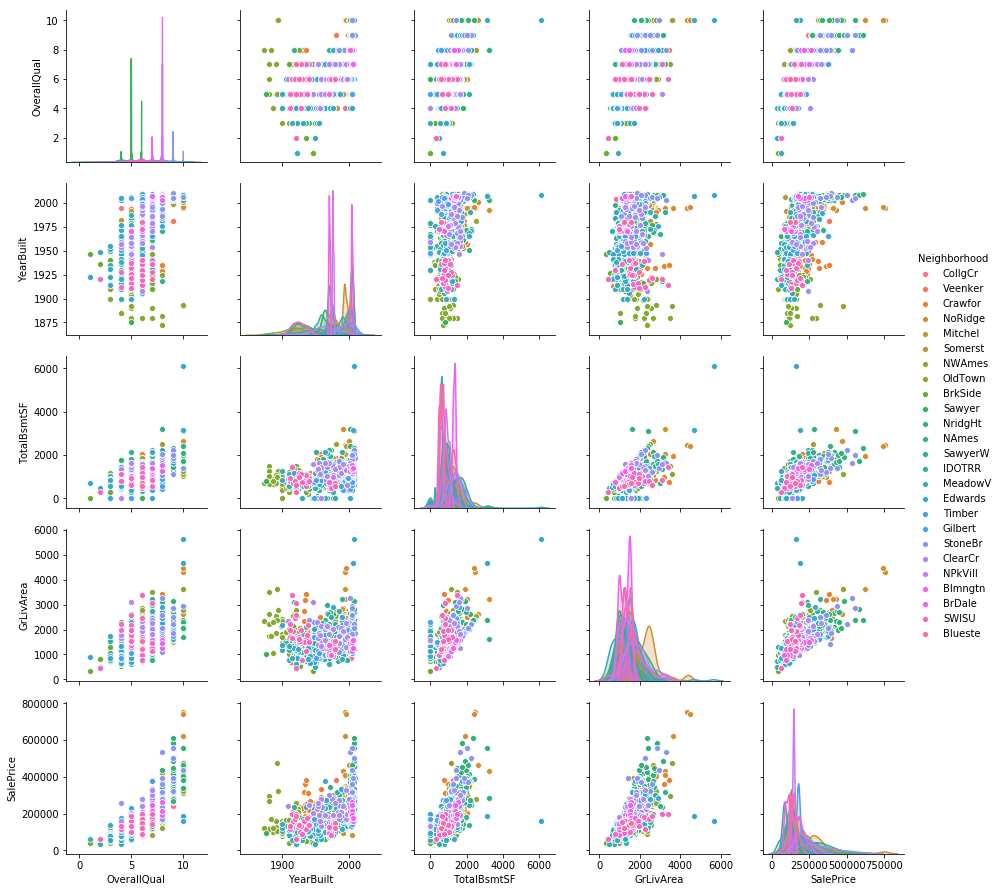

In [16]:
#Creating pair plot along with categorical variable 'Neighborhood' to get relation with Sale Price and other variables
sns.pairplot(X,hue='Neighborhood')

With above scatter plots and pair plots we can say that numerical variables have linear relationship with Sale Price and Categorical variables also have some relationship with Sale Price , will dig more on Categorical variables

Note: If we observe graph between 'OverallQual' and 'SalePrice' we can see that though it's a numerical variable it's actually a  categorical variable and on checking the variable description it's pretty evident that 'OverallQual' is a categorical variable only


Let's analyze relationship between Categorical variables and Sale price with the help of box plots

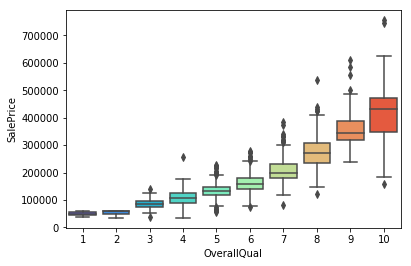

In [17]:
#Box plot between 'OverallQuality' and 'Sales Price'
sns.boxplot(x=X['OverallQual'],y=X['SalePrice'],palette='rainbow')

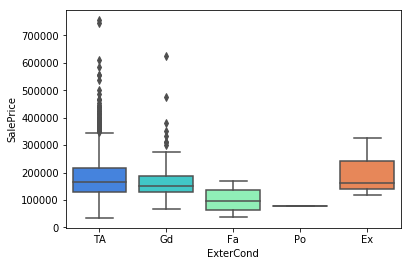

In [18]:
#Box plot between 'ExterCond' and 'Sales Price'
sns.boxplot(x=X['ExterCond'],y=X['SalePrice'],palette='rainbow')

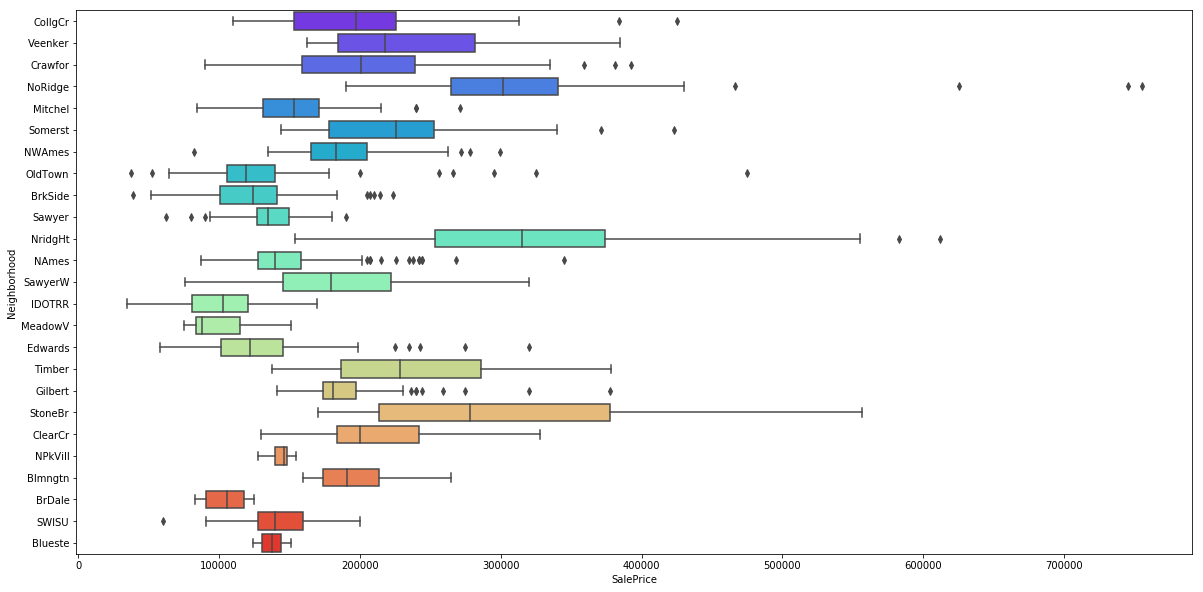

In [19]:
#Box plot between 'Neighborhood' and 'Sales Price'
plt.figure(figsize=(20,10))
sns.boxplot(y=X['Neighborhood'],x=X['SalePrice'],palette='rainbow')

With these plots we can see that out of three categorical variables only 'OverallQual' is having linear relationship with 'SalePrice'(When Quality increase Sales Price also increase) and other two variables i.e. 'Neighborhood' and 'ExtCond' does not show any linear relationship. Based on this we can skip these two variables from our feature list

Now, we have independent variables (features) 'OverallQual','YearBuilt','TotalBsmtSF','GrLivArea' and from above analysis we know that 'OverallQual','TotalBsmtSF','GrLivArea' are linearly related to our dependent variable('SalePrice') for 'YearBuilt' let's create box plot graph with 'SalePrice' to see the relation ship more clearly between these two

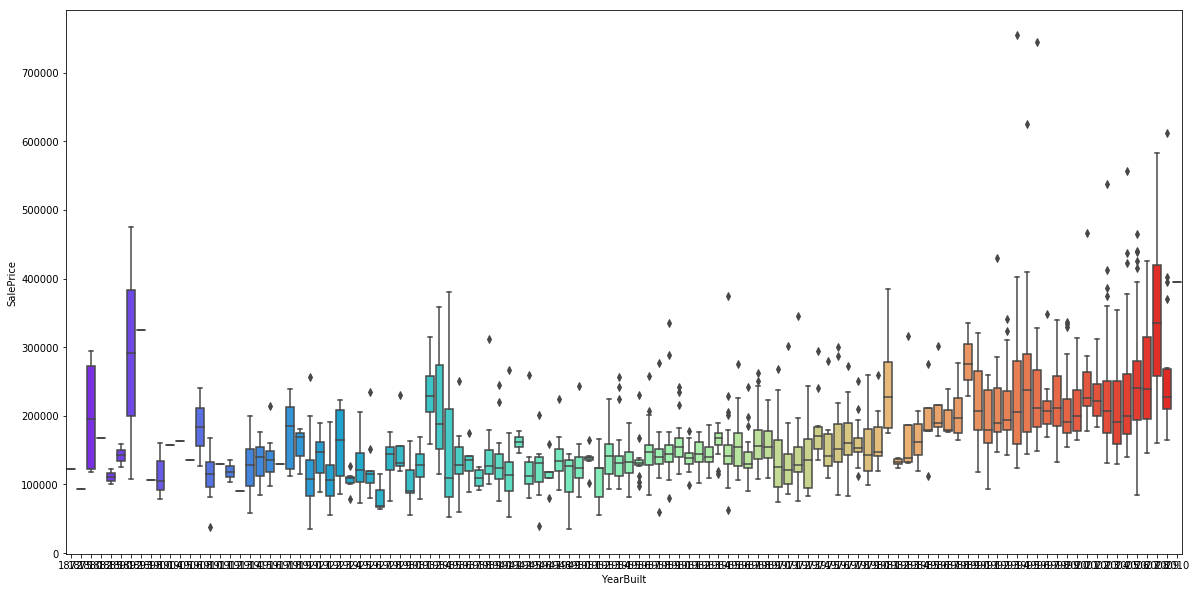

In [20]:
#Box plot between 'Year built' and 'Sales Price' to check sales price across years
plt.figure(figsize=(20, 10))
sns.boxplot(x=X['YearBuilt'],y=X['SalePrice'],palette='rainbow')

Here, we can see that 'YearBuilt' and 'SalePrice' are kind of linearly related as Sales price increases over the years.From scatter and box plots for 'OverallQual' and 'YearBuilt' we can say that they are kind of linearly related with Sales Price

Now , lets consider other numerical variable with high correlation cofficent which I have skipped during my initial data analysis because these variables does not look relevant to me. But due to high correlation cofficent numbers let's consider them now , and these variables are
'FullBath','1stFlrSF',
'YearRemodAdd','GarageCars','GarageArea'

On checking data description and correlation coffecient it looks like that 'YearRemodAdd'//'YearBuilt' , 'TotalBsmtSF' //'1stFlrSF' ,'GarageCars'//'GarageArea' variables are kind of identical variables only .If we practially think about these variables, we can conclude that they give almost the same information so multicollinearity can occurs
So we can consider only 'FullBath','GarageCars' in new list and ignore the remaining of them

In [21]:
#Adding new independent Variables in X
X=dataset[['FullBath','OverallQual','YearBuilt','TotalBsmtSF','GrLivArea','GarageCars','SalePrice']]

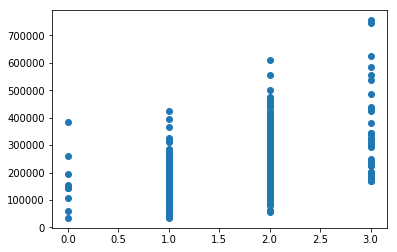

In [22]:
#Verifying the relation between FullBath and SalePrice
plt.scatter(X['FullBath'],X['SalePrice'])

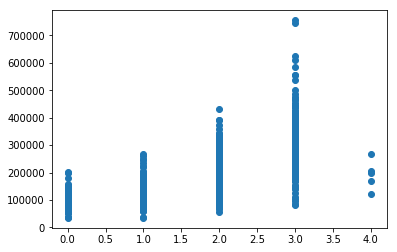

In [23]:
#Verifying the relation between FullBath and SalePrice
plt.scatter(X['GarageCars'],X['SalePrice'])

With above two graphs we can say that 'FullBath' and 'GarageCars' have linear relationship with Sale Price. 'GarageCars' have an exception(last value '4') which can be outliner value

With this updated list of dependent variables let's create a new pair plot graph to see relationship between all variables

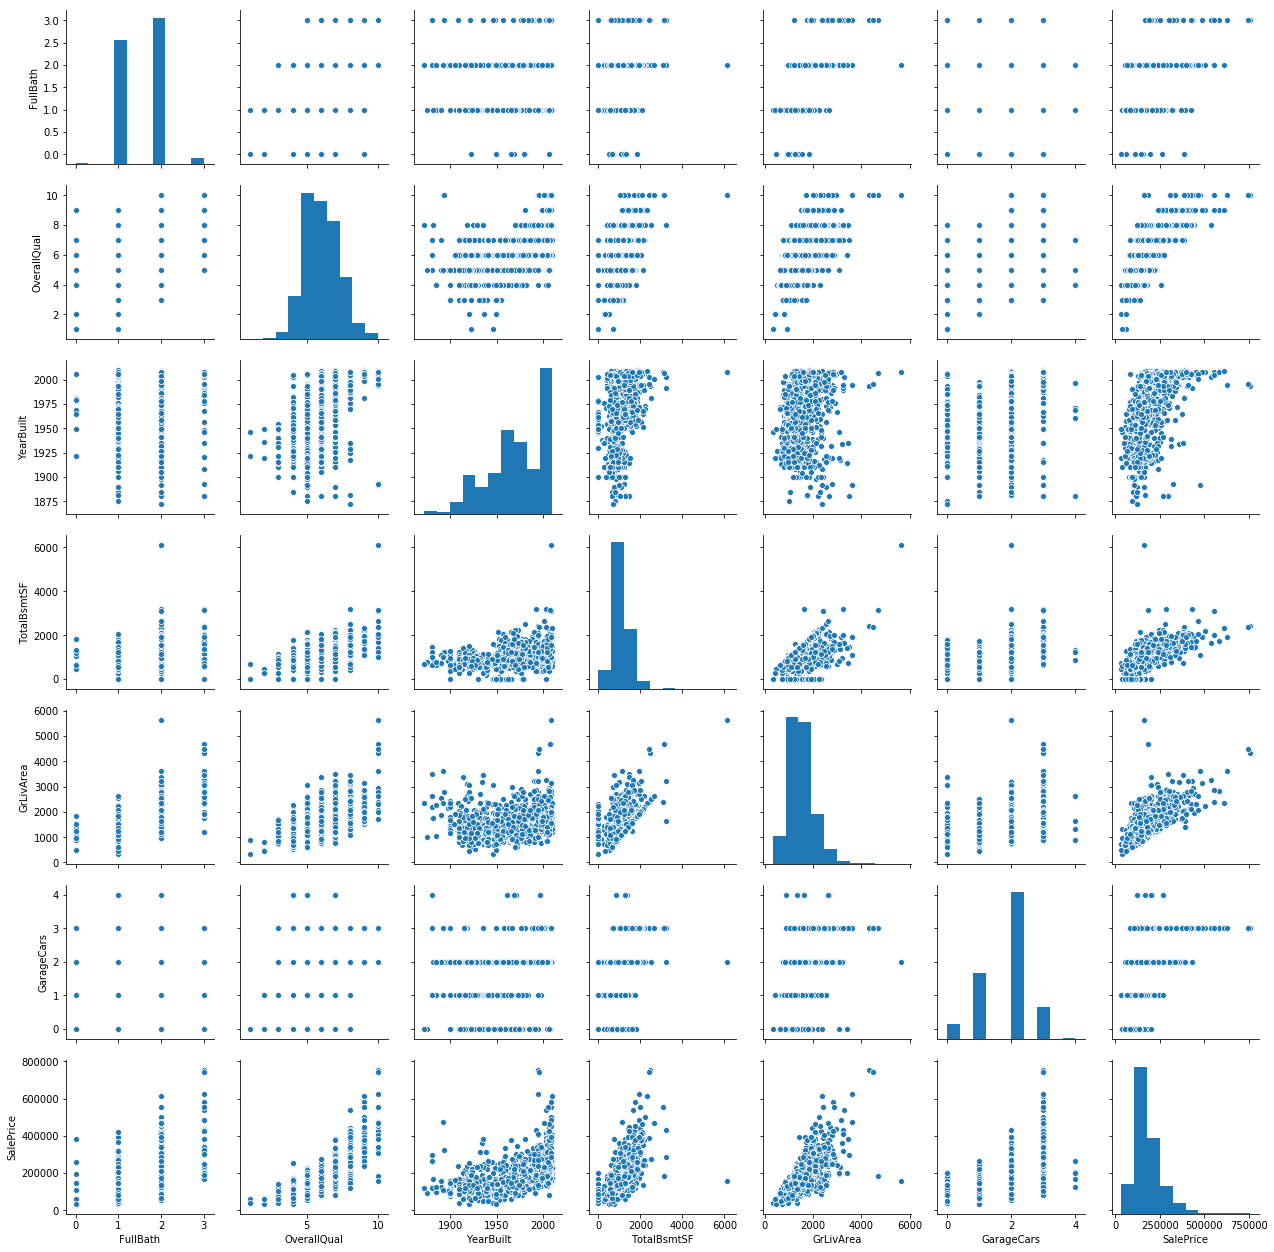

In [24]:
#Create pairplot with new list
sns.pairplot(X)

If we see last row of Sale Price with each independent variables we will find out that all dependent are somewhat linearly related to Sale Price(dependent variable) and all these variables have high correlation coefficient with dependent variable


# 3. Missing Values

Let's check missing values in our independent and dependent variables

In [25]:
#Checking missing values 
total_missing_values_X=X.isnull().sum().sort_values(ascending=False)
total_missing_values_X

SalePrice      0
GarageCars     0
GrLivArea      0
TotalBsmtSF    0
YearBuilt      0
OverallQual    0
FullBath       0
dtype: int64

There is no missing values in our independent and dependent variables so we are good for model fitting , but before that let's look into Outliers

# 4. Outliers

If we see our graph between 'GirLivArea' ,'TotalBsmtSF' and 'GarageCars' with 'SalePrice' we can see that there are few points which are out of the crowd (not following the trend of regression) and we can consider them as outliers .There can be logical reason behind these outliers , like for 'GirLivArea' there are two observation where Sale price decreased with high above ground living area so posisble reason can be that these properties are located in outskirts or agriculture area or can be anything and we are not sure about these so we will treat them as outliers and delete them

In [26]:
#Checking first two values in 'GirLivArea' for outliers
X.sort_values(by='GrLivArea',ascending=False)[:2]

,FullBath,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,SalePrice
1298,2,10,2008,6110,5642,2,160000
523,3,10,2007,3138,4676,3,184750


In [27]:
#Drop outliers rows from the data set
X=X.drop(1298)
X=X.drop(523)

For 'TotalBsmtSF' only one outlier was there which was at index '1298' and same got deleted with 'GrLivArea'.

Now For 'GarageCars' on looking at graph we can say when 'GarageCars' value is 4 then sale price is dropped and does not follow the trend , so we will drop the rows where Garage car value is 4

In [28]:
#Get index for records with GarageCars as 4
indexNames=X[X['GarageCars'] == 4].index

In [29]:
#Drop the records for GarageCars as 4
X=X.drop(indexNames)

Now we will create pair plot one more time to check outliers are coming or not

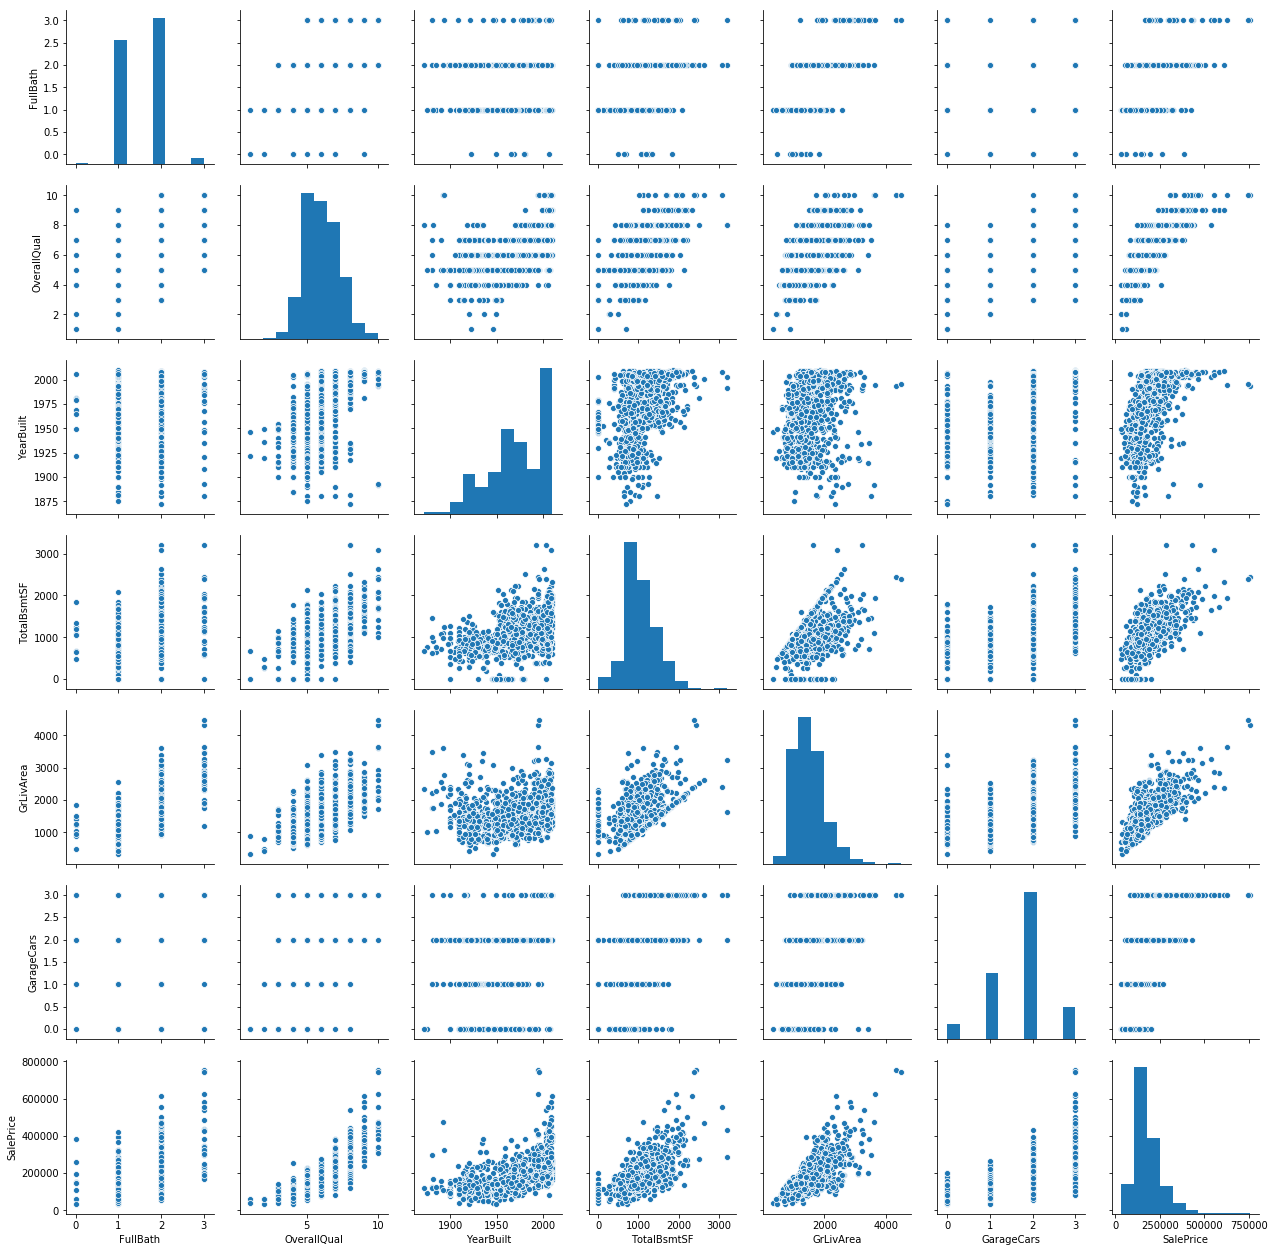

In [30]:
#Create pairplot with new list
sns.pairplot(X)

Now there is not much outliers coming in our data . We can see few point in 'TotalBsmtSF' but they are pretty much following the trend so we will leave them and we can start modelling our data

# 5. Data Modeling

In [31]:
#Split independent and dependent variables
X=dataset[['FullBath','OverallQual','YearBuilt','TotalBsmtSF','GrLivArea','GarageCars']]
y=dataset[['SalePrice']]

In [32]:
# Fitting Multiple linear regression to the data set
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
#Predicting the train set results
y_pred=regressor.predict(X)

In [34]:
#Converting y from series to array , to generate a graph for comparision with y_pred
y=y.values

In [35]:
#Rounding off the y_pred 
y_pred=y_pred.round()

In [36]:
#Converting 2 dimensional y and y_pred array into single dimension 
y=y.ravel()
y_pred=y_pred.ravel()
y_pred

array([215741., 173756., 221045., ..., 222935., 120024., 139892.])

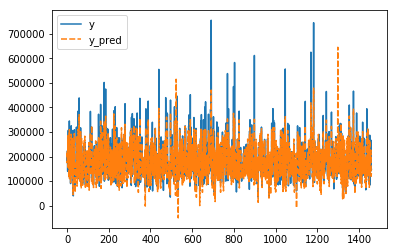

In [37]:
#Creating data frame for y and y_pred to create line plot
df=pd.DataFrame({"y":y,"y_pred":y_pred})
sns.lineplot(data=df)

From above graph it's evident that our predicted Sale value is matching with actual sale value but with few mismatch values . It means there is a scope of remodelling here. Let's get some statistics related to this model

In [38]:
#importing required libraries and building new regression object
import statsmodels.formula.api as sm
regressor_OLS = sm.OLS(endog = y, exog = X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     5958.
Date:                Sun, 01 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:40:28   Log-Likelihood:                -17508.
No. Observations:                1460   AIC:                         3.503e+04
Df Residuals:                    1454   BIC:                         3.506e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
FullBath     2057.0280   2538.762      0.810      0.418   -2922.999    7037.055
OverallQual  2.364e+04   1116.017     21.182      0.000    2.15e+04    2.58e+04
YearBuilt     -51.4424      2.470    -20.829      0.000     -56.287     -46.598
TotalBsmtSF    33.1320      2.864     11.568      0.000      27.514      38.750
GrLivArea      43.6853      2.777     15.733      0.000      38.239      49.132
GarageCars   1.911e+04   1777.065     10.756      0.000    1.56e+04    2.26e+04
==============================================================================
Omnibus:                      406.738   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            33465.657
Skew:                          -0.204   Prob(JB):                         0.00
Kurtosis:                      26.451   Cond. No.                     6.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From above summary we can say that 'P' value for 'FullBath' is pretty high (> significant value of .05) so we can drop this feature and remodel our model
Note: Removing feature/independent varaible based on 'P' value is called process of Backward Elimination 

In [39]:
#Removing 'FullBath' from list of independent variables
X=dataset[['OverallQual','YearBuilt','TotalBsmtSF','GrLivArea','GarageCars']]

In [40]:
#Rebuilding and fitting the model again
regressor_OLS = sm.OLS(endog = y, exog = X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     7151.
Date:                Sun, 01 Dec 2019   Prob (F-statistic):               0.00
Time:                        15:40:28   Log-Likelihood:                -17508.
No. Observations:                1460   AIC:                         3.503e+04
Df Residuals:                    1455   BIC:                         3.505e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
OverallQual  2.381e+04   1095.233     21.742      0.000    2.17e+04     2.6e+04
YearBuilt     -51.2050      2.452    -20.883      0.000     -56.015     -46.395
TotalBsmtSF    32.9429      2.854     11.542      0.000      27.344      38.542
GrLivArea      44.6728      2.495     17.908      0.000      39.779      49.566
GarageCars   1.934e+04   1754.536     11.024      0.000    1.59e+04    2.28e+04
==============================================================================
Omnibus:                      411.894   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            34418.810
Skew:                          -0.233   Prob(JB):                         0.00
Kurtosis:                      26.782   Cond. No.                     4.87e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now, this looks pretty stable model as R square value is very close to 1 and P value for every variables are zero (< .05). Will create a new model and calclulate new predicted value

In [41]:
#Creating new regressor object and fitting the model
regressor_new=LinearRegression()
regressor_new.fit(X,y)
y_pred_new=regressor_new.predict(X)

In [42]:
#Rounding off the y_pred_new
y_pred_new=y_pred_new.round()

In [43]:
#Converting 2 dimensional y and y_pred array into single dimension 
y_pred_new=y_pred_new.ravel()

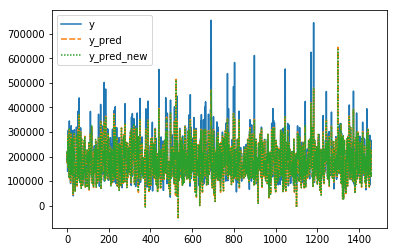

In [44]:
#Creating data frame for y ,y_pred,y_pred_new to create line plot
df=pd.DataFrame({"y":y,"y_pred":y_pred,"y_pred_new":y_pred_new})
sns.lineplot(data=df)

Green and Orange lines are almost overlapping each other (only very few exception , need to zoom for that) , but this is on train data set. We need to make our prediction on test set, so will repeat these steps on test set and verify our findings.
Since, removing 'FullBath' variable does not improve our prediction values so we will keep it in our test data set

# 6. Prediction from Test Data

Let's summarize what we have done till now
    1. Data import
    2. Data analysis
    3. Selection of independent variables
    4. Verifying any missing values
    5. Removal of Outliers
    6. Data modeling
    7. Prediction

To get prediction from test data we have to perform step 4 and 5 and fit our model on test data

In [45]:
#Get test data 
dataset_test=pd.read_csv('test.csv')

In [46]:
#Create X_test and fetching id in different frame
X_test=dataset_test[['OverallQual','YearBuilt','GrLivArea','FullBath','TotalBsmtSF','GarageCars']]
y_test_id=dataset_test[['Id']]
X_test.head()

,OverallQual,YearBuilt,GrLivArea,FullBath,TotalBsmtSF,GarageCars
0,5,1961,896,1,882.0,1.0
1,6,1958,1329,1,1329.0,1.0
2,5,1997,1629,2,928.0,2.0
3,6,1998,1604,2,926.0,2.0
4,8,1992,1280,2,1280.0,2.0


In [47]:
#Checking missing value in test data set
total_missing_values_X_test=X_test.isnull().sum().sort_values(ascending=False)
total_missing_values_X_test

GarageCars     1
TotalBsmtSF    1
FullBath       0
GrLivArea      0
YearBuilt      0
OverallQual    0
dtype: int64

In [48]:
#Checking the missing Garage Cars record
X_test[X_test['GarageCars'].isnull()]

,OverallQual,YearBuilt,GrLivArea,FullBath,TotalBsmtSF,GarageCars
1116,5,1923,1828,2,859.0,NaN


In [49]:
 #Checking the missing Total Bsmt SF record
X_test[X_test['TotalBsmtSF'].isnull()]

,OverallQual,YearBuilt,GrLivArea,FullBath,TotalBsmtSF,GarageCars
660,4,1946,896,1,NaN,1.0


We can use Imputer library to take care of missing value but in this scenario only one value is missing in both columns so we will update that with most frequent value and mean value in 'Garage Cars' and 'TotalBsmtSF' respectively.

For 'Garage Cars' we  can say that value '2' is most common in test data so we will replace the missing with this value

In [50]:
#Updating Garage Cars to 2 at missing value index
X_test.at[1116,'GarageCars'] = 2

In [51]:
#Verifying the missing value in Garage Cars
X_test[X_test['GarageCars'].isnull()]

,OverallQual,YearBuilt,GrLivArea,FullBath,TotalBsmtSF,GarageCars


Now we will check 'TotalBsmtSF' mean and update the same to missing value

In [52]:
#Fetching 'TotalBsmtSF' information
X_test['TotalBsmtSF'].describe()

count    1458.000000
mean     1046.117970
std       442.898624
min         0.000000
25%       784.000000
50%       988.000000
75%      1305.000000
max      5095.000000
Name: TotalBsmtSF, dtype: float64

In [53]:
#Updating the missing value to mean value
X_test.at[660,'TotalBsmtSF'] = 1046.12

In [54]:
#Verifying the missing value in TotalBsmtSF
X_test[X_test['TotalBsmtSF'].isnull()]

,OverallQual,YearBuilt,GrLivArea,FullBath,TotalBsmtSF,GarageCars


In [55]:
#Checking missing value in test data set again
total_missing_values_X_test=X_test.isnull().sum().sort_values(ascending=False)
total_missing_values_X_test

GarageCars     0
TotalBsmtSF    0
FullBath       0
GrLivArea      0
YearBuilt      0
OverallQual    0
dtype: int64

Now we can see there is no missing value in test data set , let's deal with outliers now.

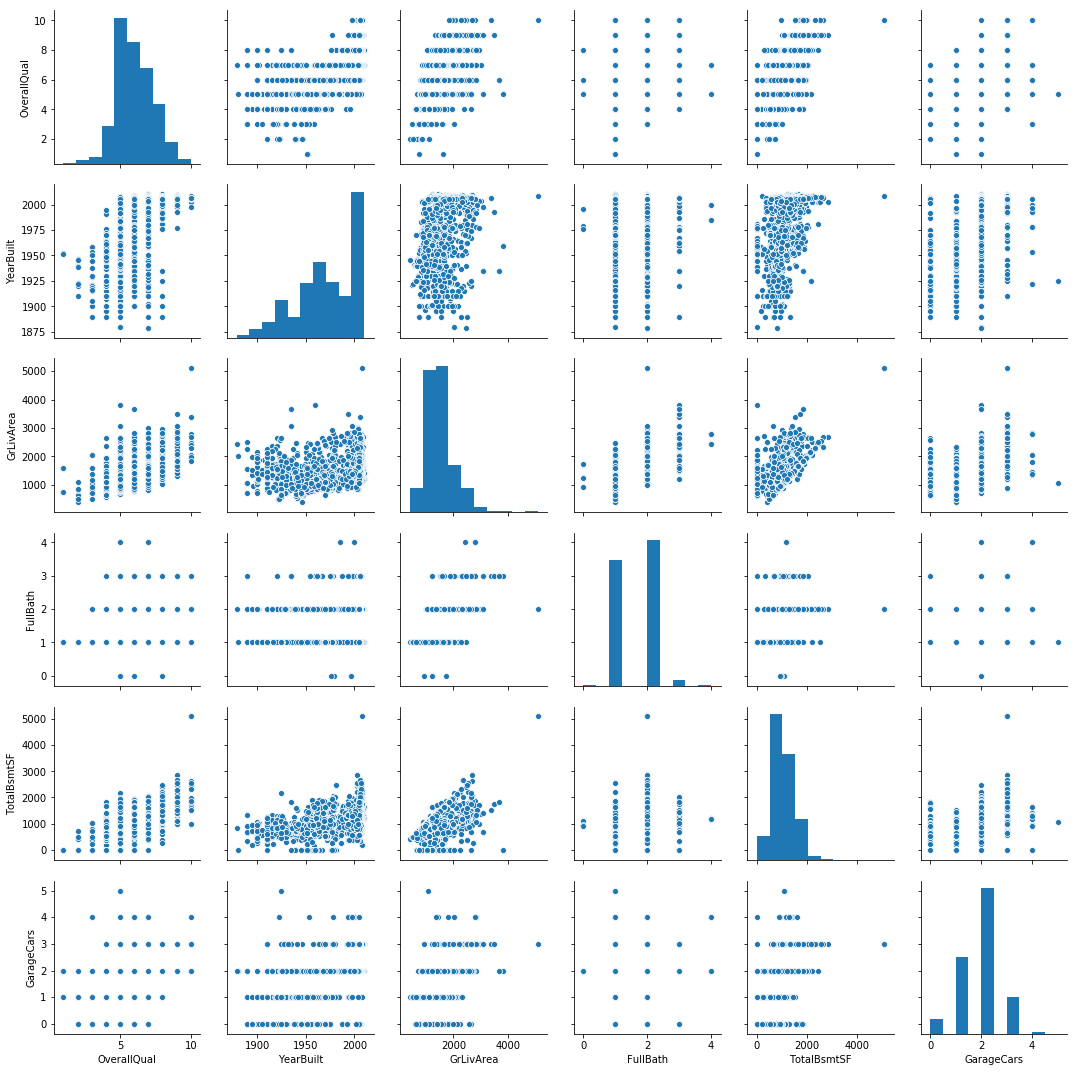

In [56]:
#Visualize test data
sns.pairplot(X_test)

Based on our train set data and above pairplot, we will check top values in 'GirLivArea' and 'TotalBsmtSF'

In [57]:
X_test.sort_values(by='GrLivArea',ascending=False)[:2]

,OverallQual,YearBuilt,GrLivArea,FullBath,TotalBsmtSF,GarageCars
1089,10,2008,5095,2,5095.0,3.0
728,5,1959,3820,3,0.0,2.0


In [58]:
X_test.sort_values(by='TotalBsmtSF',ascending=False)[:2]

,OverallQual,YearBuilt,GrLivArea,FullBath,TotalBsmtSF,GarageCars
1089,10,2008,5095,2,5095.0,3.0
19,9,2003,2696,2,2846.0,3.0


In [59]:
#We can drop the outliers but our submission csv needs 1459 records 
#X_test=X_test.drop(1089)

In [60]:
#Creating predictions based on X_test
y_test_pred=regressor.predict(X_test)

In [61]:
#Converting 2 dimensional y_test_pred into single dimension 
y_test_pred=y_test_pred.ravel()
#Rounding off the values
y_test_pred=y_test_pred.round()

In [62]:
#Converting Id into array
y_test_id=y_test_id.values

In [63]:
#Converting 2 dimensional y_test_id into single dimension 
y_test_id=y_test_id.ravel()

In [64]:
#Creating Submission dataframe from id and predecited Sale price
submission_df=pd.DataFrame({"Id":y_test_id,"SalePrice":y_test_pred})
#Setting index as Id Column
submission_df.set_index("Id")

,SalePrice
Id,
1461,39838319.0
1462,39941152.0
1463,40840890.0
1464,40847384.0
1465,40623358.0
1466,40753134.0
1467,40597010.0
1468,40793196.0
1469,40609404.0


In [65]:
#Converting into CSV file for submission
submission_df.to_csv("submission.csv")

# 6. K-Fold Techniques

In [66]:
#Apply K-fold in current model to check model accuracy
from sklearn.model_selection import cross_val_score
accuracies_linreg_model = cross_val_score(estimator = regressor, X = X, y = y, cv = 10)


In [67]:
#Checking accuracies for 10 fold in linear regression model
accuracies_linreg_model

array([0.79647749, 0.81510758, 0.85897687, 0.71098064, 0.77860569,
       0.78549543, 0.76995542, 0.78127085, 0.53699653, 0.82375751])

In [68]:
#Checking Mean and Standard Deviation between accuracies
accuracies_linreg_model.mean()
accuracies_linreg_model.std()

0.08460380136977683

Mean Accuracy is coming close to 76% and standard Devaition is also not that much (~9%) , but still we can verify other model also.
Let's try with Random Forest Regression Model

# 7. Random Forest Regression

In [69]:
#Creating new Regressor model for Random forest regression
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
random_forest_regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [70]:
# Predicting from test set with this new model
y_test_random_forest_pred=random_forest_regressor.predict(X_test)

ValueError: Number of features of the model must match the input. Model n_features is 5 and input n_features is 6 

In [ ]:
#Converting 2 dimensional y_test_pred into single dimension 
y_test_random_forest_pred=y_test_random_forest_pred.ravel()
#Rounding off the values
y_test_random_forest_pred=y_test_random_forest_pred.round()

In [ ]:
#Creating Submission dataframe from id and predecited Sale price
submission_random_forest_df=pd.DataFrame({"Id":y_test_id,"SalePrice":y_test_random_forest_pred})
#Setting index as Id Column
submission_random_forest_df.set_index("Id")

In [ ]:
#Converting into CSV file for submission
submission_random_forest_df.to_csv("submission.csv")

Score is improved with this submission but not in top 100 , withlinear regression model score(RMSE) was 5.51 and with Random Forest regressor model it is 0.58904.
Will check Model accuracy with K fold techniques

In [ ]:
accuracies_randomforest_model = cross_val_score(estimator = random_forest_regressor, X = X, y = y, cv = 10)

In [ ]:
#Calculating Mean and Standard Deviation
accuracies_randomforest_model.mean()
accuracies_randomforest_model.std()

Mean Accuracy is coming close to 83% and standard Devaition is also not that much (~6%) , so this is far better than our previous model
Let's Try  hyper parmater tuning -Grid Search for fine tuning our parmaeters and find best model

# 7. Hyperparameter Tuning - Grid Search 

For implementing Grid Search in Random Forest Regressor model I have used blog https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,y)

In [ ]:
#Checking Best params
rf_random.best_params_

In [ ]:
# Predicting from test set with this new model
y_test_rf_random_pred=rf_random.predict(X_test)

In [ ]:
#Converting 2 dimensional y_test_pred into single dimension 
y_test_rf_random_pred=y_test_rf_random_pred.ravel()
#Rounding off the values
y_test_rf_random_pred=y_test_rf_random_pred.round()

In [ ]:
#Creating Submission dataframe from id and predecited Sale price
submission_rf_random_df=pd.DataFrame({"Id":y_test_id,"SalePrice":y_test_rf_random_pred})
#Setting index as Id Column
submission_rf_random_df.set_index("Id")

In [ ]:
#Converting into CSV file for submission
submission_rf_random_df.to_csv("submission.csv")

Score is improved with this submission , before hyper tuning of parameters it was 0.58904 and now it is 0.38878
Will check Model accuracy with K fold techniques

In [ ]:
accuracies_rf_random_model = cross_val_score(estimator = rf_random, X = X, y = y, cv = 10)

In [ ]:
#Calculating Mean and Standard Deviation
accuracies_rf_random_model.mean()
accuracies_rf_random_model.std()

Mean Accuracy is coming close to 84% and standard Devaition is also not that much (~5.8%) , so this is far better than our previous model. This tuning was not part of our plan , I got a nice article so I tried to implemented.
Let's try actual Grid Search

In [ ]:
# Applying Grid Search to find the best model and the best parameters in our actual random forest regressor model
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
grid_search = GridSearchCV(estimator = random_forest_regressor, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search = grid_search.fit(X, y)


In [ ]:
#Checking best accuracy and best parameters
best_accuracy = grid_search.best_score_
best_accuracy
best_parameters = grid_search.best_params_
best_parameters

In [ ]:
#Create a new model based on above best paramters
rf_regressor_new = RandomForestRegressor(n_estimators = 100,bootstrap=True,max_depth=80,max_features=3,min_samples_leaf=3,min_samples_split=8,random_state = 0)
rf_regressor_new.fit(X, y)

In [ ]:
# Predicting from test set with this new model
y_test_rf_pred_new=rf_regressor_new.predict(X_test)

In [ ]:
#Converting 2 dimensional y_test_pred into single dimension 
y_test_rf_pred_new=y_test_rf__pred_new.ravel()
#Rounding off the values
y_test_rf_pred_new=y_test_rf__pred_new.round()

In [ ]:
#Creating Submission dataframe from id and predecited Sale price
submission_rf_new_df=pd.DataFrame({"Id":y_test_id,"SalePrice":y_test_rf_pred_new})
#Setting index as Id Column
submission_rf_new_df.set_index("Id")

In [ ]:
submission_rf_new_df.to_csv("submission.csv")

Score is not improved with this submission , before it was  0.38878 now it is 0.49012.
Previous Random Model which is 'rf_random' was giving better results , let's train this model without 'FullBath' because it's 'P' value was coming high

In [ ]:
#Removing 'FullBath' variable from test and train data set
X_test=dataset_test[['OverallQual','YearBuilt','GrLivArea','TotalBsmtSF','GarageCars']]
X=dataset[['OverallQual','YearBuilt','TotalBsmtSF','GrLivArea','GarageCars']]
#Need to handel missing values in test data set as we have assinged new test data 

In [ ]:
# Fit the random search model
rf_random.fit(X,y)

In [ ]:
# Predicting from test set with this new model
y_test_rf_random_pred_1=rf_random.predict(X_test)

In [ ]:
#Converting 2 dimensional y_test_pred into single dimension 
y_test_rf_random_pred_1=y_test_rf_random_pred_1.ravel()
#Rounding off the values
y_test_rf_random_pred_1=y_test_rf_random_pred_1.round()

In [ ]:
#Creating Submission dataframe from id and predecited Sale price
submission_rf_random_df_1=pd.DataFrame({"Id":y_test_id,"SalePrice":y_test_rf_random_pred_1})
#Setting index as Id Column
#submission_rf_random_df_1.set_index("Id")

In [ ]:
#Converting into CSV file for submission
submission_rf_random_df_1.to_csv("submission.csv")

# Submission with this is improved to 0.17542 , best so far

In [ ]:
#Check with SVM model
from sklearn.svm import SVR
regressor_svm=SVR(kernel='rbf')
regressor_svm.fit(X,y)

In [ ]:
# Predicting from test set with this new model
y_pred_svm=regressor_svm.predict(X_test)

In [ ]:
#Converting 2 dimensional y_test_pred into single dimension 
y_pred_svm=y_pred_svm.ravel()
#Rounding off the values
y_pred_svm=y_pred_svm.round()

In [ ]:
#Creating Submission dataframe from id and predecited Sale price
submission_svm_df=pd.DataFrame({"Id":y_test_id,"SalePrice":y_pred_svm})
#Setting index as Id Column
#submission_svm_df.set_index("Id")

In [ ]:
#Converting into CSV file for submission
submission_svm_df.to_csv("submission.csv")

This will bring pretty bad score as al most all predicted values are coming as same value  which is '163000'

In [ ]:
#check with decision tree
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X, y)

In [ ]:
# Predicting from test set with this new model
y_pred_dt=regressor_dt.predict(X_test)

In [ ]:
#Converting 2 dimensional y_test_pred into single dimension 
y_pred_dt=y_pred_dt.ravel()
#Rounding off the values
y_pred_dt=y_pred_dt.round()

In [ ]:
#Creating Submission dataframe from id and predecited Sale price
submission_dt_df=pd.DataFrame({"Id":y_test_id,"SalePrice":y_pred_dt})
#Setting index as Id Column
#submission_dt_df.set_index("Id")

In [ ]:
#Converting into CSV file for submission
submission_dt_df.to_csv("submission.csv")

With this score is 0.28806 which is way to less than XGboost and Random Forest. We will try to do hyperparmater tuning with Decision tree